In [1]:
##########################################
#### Import the necessary modules ########
##########################################
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
####################################
#### Setting the parameters ########
####################################

# You can set the parameters to whatever values you want to simulate Wolbachia infections
# with the specified behavior.

# The parameter ranges within which these parameters usually are in insects in general are as follows:
# µ: 0-0.15
# ß: 0.8-1.2
# γ: 0-1

# The parameters set by defaul are the ones used to produce supplemtal figure 1. (µA = 0.1, ßA = 1.0, µS = 0.1,ßS = 1.1,γ = 0.8)

µA = 0.1
ßA = 1.0

µS = 0.1
ßS = 1.1
γ = 0.8

# If you want to simulate a case without CI, set γ to np.e**(-20) rather than 0 to avoid errors that 
# occur when attempting to divide by zero.

In [3]:
############################################################################
#### Defining the functions repersenting the differential equations ########
############################################################################

def BasicShares (FSI0,t):
    
    """ Defines the differential equation combining the sexual and parthenogenetic generations of the basic model.
    The equation defined here is equation 3 of the supplementary material with the added term "-FSI". This way, the
    change of frequency instead of the actual frequency is calculated.
    This function can be used with numpys odeint to solve the differential equations and return 
    infection frequencies at each point in time.
    
    Inputs:
    FSI0: Either one initial frequency of the infection, set to a value between 0 and 1, can be provided in order
    to solve the differential equation for this initial frequency.
    Alternatively, an array of frequencies for which to calculate the derivative given the defined equation can be
    given. This is used to visualize the differential equation itself.
    t: An array containing a sequence of monotonically increasing time points for which to solve the differential equation.
    
    Returns:
    If a single value was provided for FSI0, the function returns the derivative of the infection frequency for this 
    specific value. If multiple values were provided, this is done for each of them.
    
    """
    
    FSI=FSI0 
    dFSIdt = ((ßA*(1-µA))/(ßA-1+((ßS-1-γ+(1/FSI)+(1-ßS*µS)*γ*FSI)/((1-µS)*ßS))))-FSI
    return(dFSIdt)


## Defining the equations of the basic model and the model extension:
def AlphaShares (FI0,t):
    
    """ Defines the differential equation extending the basic model with alpha values.
    The equations defined here are equivalent to equations 1,2, 7 and 8 of the manuscript with the 
    added terms "-FSI", "-FAI", "-FaS", "-FaA". 
    This way, the change of frequencies instead of the actual frequencies are calculated.
    This function can be used with numpys odeint to solve the differential equations and return 
    infection frequencies at each point in time.
    
    Inputs:
    FSI0: Either one initial frequency of the infection, set to a value between 0 and 1, can be provided in order
    to solve the differential equation for this initial frequency.
    Alternatively, an array of frequencies for which to calculate the derivative given the defined equation can be
    given. This is used to visualize the differential equation itself.
    t: An array containing a sequence of monotonically increasing time points for which to solve the differential equation.
    
    Returns:
    If a single value was provided for FSI0, the function returns the derivatives of the infection frequencies and
    alpha values for this specific value. If multiple values were provided, this is done for each of them.
    
    """
    
    FSI=FI0[0]
    FAI=FI0[1]
    FaS=FI0[2]
    FaA=FI0[3]

    # Equations describing the change of infection frequencies:
    # Equation 1:
    dFSIdt = ((ßS*(1-µS))/(ßS-1+(1/FAI)))-FSI
    # Equation 2:
    dFAIdt = (((1-µA)*ßA)/(ßA*(1-µA*γ*FSI)+(((1/FSI)-1)*(1-γ*FSI))))-FAI
    
    # Equations describing the change of alpha values:
    # Equation 7:
    dFaSdt = 1- ((1-FaA)/((µA*ßA*FAI)/(1-FAI)+1)) -FaS
    # Equation 8:
    dFaAdt = 1- ((1-FaS)/((µS*ßS*FSI)/(1-FSI)+1)) -FaA
    
    return(dFSIdt,dFAIdt,dFaSdt,dFaAdt)

The equalibrium frequency is 0.7891535435338692
the threshhold is 0.19399252388186083


(0.0, 1.0)

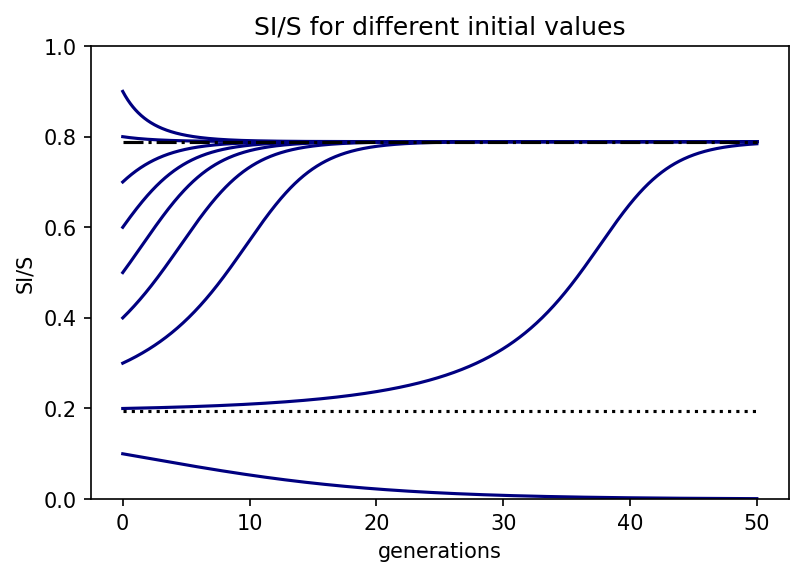

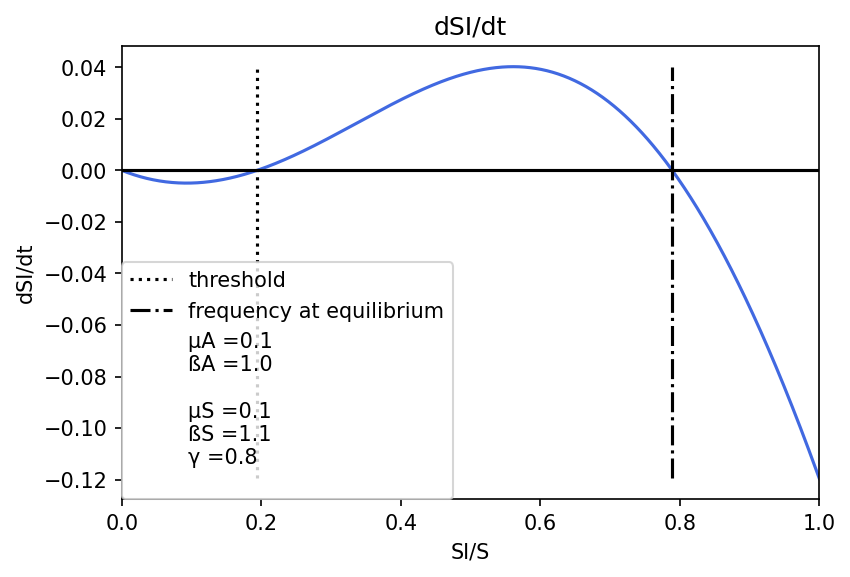

In [10]:
######################################################################################
#### Supplemental figure 1: Demonstration of the equations of the basic model ########
######################################################################################

## Set the numer of generations:
# depending on the parameters you choose the infection might spread very fast or very slow,
# you might therefore want to increase the number of generations (the second number in brackets)
# that the spread is simulated for!
t = np.linspace(0,50,1000)

## Simulate the spread of Wolbachia given the parameters for initial frequencies between 0 and 1 using odeint
## to solve differential equations:
FSI0list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
pop1 = odeint(BasicShares,FSI0list[0],t)
pop2 = odeint(BasicShares,FSI0list[1],t)
pop3 = odeint(BasicShares,FSI0list[2],t)
pop4 = odeint(BasicShares,FSI0list[3],t)
pop5 = odeint(BasicShares,FSI0list[4],t)
pop6 = odeint(BasicShares,FSI0list[5],t)
pop7 = odeint(BasicShares,FSI0list[6],t)
pop8 = odeint(BasicShares,FSI0list[7],t)
pop9 = odeint(BasicShares,FSI0list[8],t)

## Define the text for the legend giving the values of the individual parameters:
textLegend = "µA =",str(µA),"\n","ßA =",str(ßA),"\n","\n","µS =",str(µS),"\n","ßS =",str(ßS),"\n","γ =",str(γ),"\n"

## Calculate the equilibrium frequency:
NST2 = -(µS*ßA*ßS - µS*ßS - ßA*ßS + γ + 1)/(2*γ*(µS*ßS - 1)) - np.sqrt(-4*µA*µS**2*ßA*ßS**2*γ + 4*µA*µS*ßA*ßS**2*γ + 4*µA*µS*ßA*ßS*γ - 4*µA*ßA*ßS*γ + µS**2*ßA**2*ßS**2 + 4*µS**2*ßA*ßS**2*γ - 2*µS**2*ßA*ßS**2 + µS**2*ßS**2 - 2*µS*ßA**2*ßS**2 - 4*µS*ßA*ßS**2*γ + 2*µS*ßA*ßS**2 - 2*µS*ßA*ßS*γ + 2*µS*ßA*ßS + 2*µS*ßS*γ - 2*µS*ßS + ßA**2*ßS**2 + 2*ßA*ßS*γ - 2*ßA*ßS + γ**2 - 2*γ + 1)/(2*γ*(µS*ßS - 1))
print("The equalibrium frequency is",NST2)

## Calculate the threshhold frequency:
NST1 = ((ßS*(-ßA+ßA*µS-µS)+γ+1)/(2*γ*(1-ßS*µS)))-(np.sqrt(((ßS*(ßA-ßA*µS+µS)-γ-1)**2)-4*γ*(1-ßS*µS)*(1-(ßA*(1-µA))*(1-µS)*ßS))/(2*γ*(1-ßS*µS)))
print("the threshhold is",NST1)

## Set up the plot:
plt.figure(dpi=150)
plt.title("SI/S for different initial values")
plt.xlabel("generations")
plt.ylabel("SI/S")
plt.ylim(0,1)
## Plot the solution of the differential equation:
plt.plot(t,pop1,color="navy",label="")
plt.plot(t,pop2,color="navy",label="")
plt.plot(t,pop3,color="navy",label="")
plt.plot(t,pop4,color="navy",label="")
plt.plot(t,pop5,color="navy",label="")
plt.plot(t,pop6,color="navy",label="")
plt.plot(t,pop7,color="navy",label="")
plt.plot(t,pop8,color="navy",label="")
plt.plot(t,pop9,color="navy",label="")
## Plot lines at the equilibrium frequencies:
plt.hlines(NST1,0,max(t),color="black",linestyles='dotted')
plt.hlines(NST2,0,max(t),color="black",linestyles='dashdot')
plt.plot()

### Plot the differential equation itself:
FSI = np.linspace(0.00001,1,1000)
plt.figure(dpi=150)
plt.title("dSI/dt")
plt.xlabel("SI/S")
plt.ylabel("dSI/dt")
plt.plot(FSI,BasicShares(FSI,1),color="royalblue")
plt.plot(FSI,(0*FSI),color="black")
plt.vlines(NST1,min(BasicShares(FSI,1)),max(BasicShares(FSI,1)),color="black",linestyles='dotted',label="threshold")
plt.vlines(NST2,min(BasicShares(FSI,1)),max(BasicShares(FSI,1)),color="black",linestyles='dashdot',label="frequency at equilibrium")
plt.plot([], [], ' ', label="".join(textLegend))
plt.legend(borderaxespad=0.)
plt.xlim(0,1)

[]

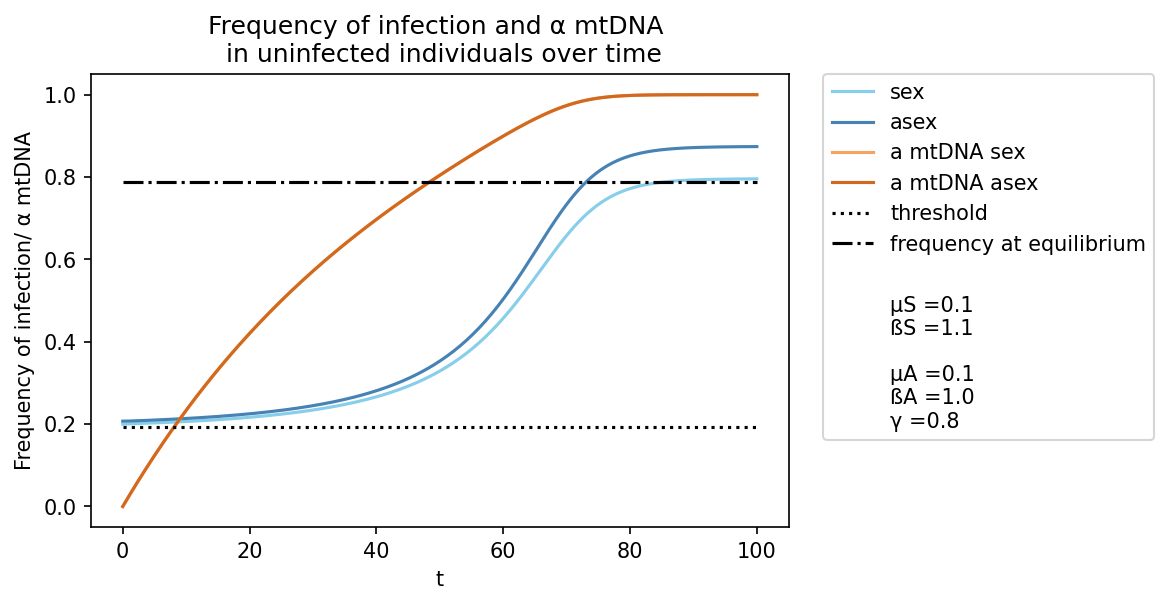

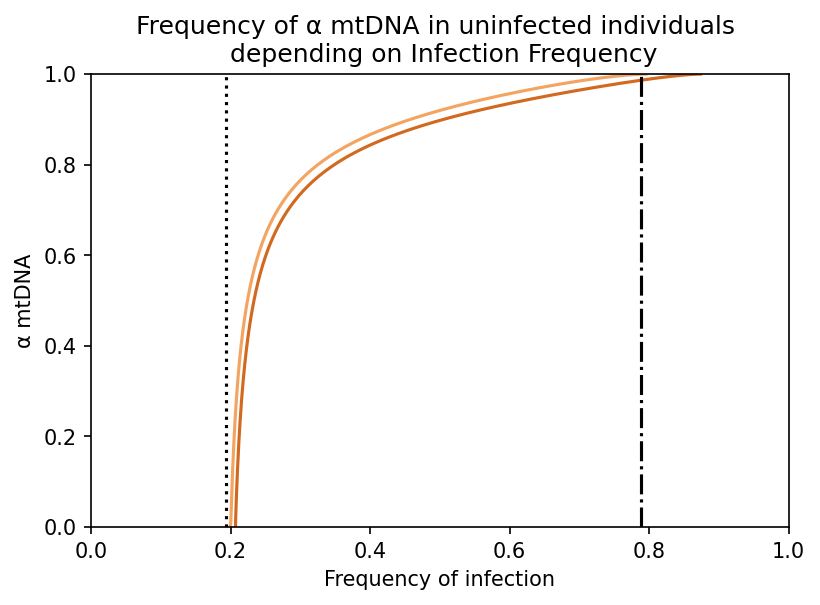

In [11]:
#####################################################################################
#### Supplemental figure 2: Demonstration of the alpha value model extension ########
#####################################################################################

## Set the numer of generations:
# depending on the parameters you choose the infection might spread very fast or very slow,
# you might therefore want to increase the number of generations (the second number in brackets)
# that the spread is simulated for!
t = np.linspace(0,100,300)

## Initial frequency:
F0 = 0.2

## Set of the initial conditions:
# We calculate the initial value of the parthenogenetic generation based on the parameters and the initial
# condition of the sexual generation, in which the infection was introduced.
FI0 = [F0,(((1-µA)*ßA)/(ßA*(1-µA*γ*F0)+(((1/F0)-1)*(1-γ*F0)))),0,0]

## Calculation and simulation of the spread:
pop = odeint(AlphaShares,FI0,t)

## Set the text for the legend describing the parameter values:
textLegend = "µS =",str(µS),"\n","ßS =",str(ßS),"\n","\n","µA =",str(µA),"\n","ßA =",str(ßA),"\n","γ =",str(γ)

## Plot the spread of both the infection and the alpha mtDNA:
plt.figure(dpi=150)
plt.plot(t,pop[:,0],label="sex",color="skyblue")
plt.plot(t,pop[:,1],label="asex",color="steelblue")
plt.plot(t,pop[:,2],label="a mtDNA sex",color="sandybrown")
plt.plot(t,pop[:,3],label="a mtDNA asex",color="chocolate")
## Plot lines at the equilibrium frequencies:
plt.hlines(NST1,0,max(t),color="black",linestyles='dotted',label="threshold")
plt.hlines(NST2,0,max(t),color="black",linestyles='dashdot',label="frequency at equilibrium")
## Add title, legend, etc. 
plt.plot([], [], ' ', label=" ")
plt.plot([], [], ' ', label="".join(textLegend))
plt.xlabel("t")
plt.ylabel("Frequency of infection/ α mtDNA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Frequency of infection and α mtDNA \n in uninfected individuals over time")
plt.plot()

## Plot the alpha value for the different infection frequencies:
plt.figure(dpi=150)
plt.plot(pop[:,0],pop[:,2],color="sandybrown",label="a mtDNA sex")
plt.plot(pop[:,1],pop[:,3],color="chocolate",label="a mtDNA asex")
## Plot lines at the equilibrium frequencies:
plt.vlines(NST1,min(pop[:,2]),max(pop[:,2]),color="black",linestyles='dotted',label="threshold")
plt.vlines(NST2,min(pop[:,2]),max(pop[:,2]),color="black",linestyles='dashdot',label="frequency at equilibrium")
## Plot title etc.
plt.xlabel("Frequency of infection")
plt.ylabel("α mtDNA")
plt.plot([], [], ' ', label="".join(textLegend))
plt.title("Frequency of α mtDNA in uninfected individuals \n depending on Infection Frequency")
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot()